# **Visualización interactiva de datos con *Plotly***
___

<img src = "https://images.prismic.io/plotly-marketing-website/bd1f702a-b623-48ab-a459-3ee92a7499b4_logo-plotly.svg?auto=compress,format" alt = "pandas Logo" width = "70%">  </img>


[***Plotly***](https://plot.ly/python/) es una librería de *Python* que permite crear gráficos interactivos que se pueden usar en cuadros de mando (*dashboards*) o sitios web tradicionales. Las visualizaciones de *Plotly* se pueden guardar como archivos **HTML** (manteniendo su interactividad) y, también, como imágenes estáticas.

En este taller guiado se discutirá el uso de *Plotly* en la construcción de visualizaciones interactivas en *Python* usando el módulo ***Plotly Express***, que permite generar visualizaciones interactivas comunes en pocas líneas de código. Es muy similar a *Seaborn* en varios aspectos, pues puede ser utilizado directamente con objetos de *pandas* usando el módulo **`plot`**. Esto permite  generar de manera flexible y dinámica visualizaciones de datos estadísticos. Además, cuenta con *datasets* populares, ideales para ejemplificar algunas de sus funcionalidades.

## **1. Importar y configurar *Plotly***
---

Primero, instalamos la última versión de ***Plotly*** por la línea de comandos:

In [3]:
# Ejecute esta celda para instalar la versión más reciente
!pip install -U plotly
!pip install -U kaleido # Necesitamos esta librería para exportar las visualizaciones como imágenes estáticas

In [4]:
import plotly
print(f'Plotly: {plotly.__version__}')

Plotly: 5.17.0


Importamos y configuramos algunas de las funciones específicas más importantes desde *Plotly*.

In [5]:
import plotly.graph_objs as go
import plotly.express as px

In [6]:
#Otras librerías y configuraciones usadas en este material
import pandas as pd
import numpy as np

print(f'Pandas: {pd.__version__}')
print(f'NumPy: {np.__version__}')

Pandas: 2.1.0
NumPy: 1.25.2


Trabajar con versiones anteriores producirá errores en funcionalidades recientemente añadidas, como en el uso de *Plotly* desde objetos de *Pandas*. Asegúrese de tener la versión *4.10.0* o superior.

> **Nota:** En el tiempo de creación de este material *Google Colaboratory* cuenta con una versión antigua por defecto (versión 4.4.0) de *Plotly*. Es importante que ejecute el comando **`!pip install -U plotly`** para cargar en el entorno la última versión disponible.

Este material fue construido con las siguientes versiones:
- Plotly 5.15.0
- Pandas 1.5.3
- NumPy 1.22.4
  

### **1.1. Datos de ejemplo**
---

En el transcurso de este taller utilizaremos varios *datasets* para construir los ejemplos. El primero de ellos contiene datos acerca de estadísticas de los [jugadores de la NBA](https://www.kaggle.com/drgilermo/nba-players-stats-20142015) que participaron en la temporada 2014-2015. Puede encontrar el *dataset* original en *Kaggle*. Este conjunto de datos cuenta con las siguientes variables:

| Variable | Definición	| Valores |
| --- | --- | --- |
| Name | 	Nombre del jugador  | |
|Games Played| Juegos disputados sobre un máximo de 82 juegos de la temporada regular.| |
|MIN| Minutos disputados en la temporada.| |
|PTS| Puntos anotados en la temporada.| |
|FGM| Tiros anotados.  | |
|FGA| Tiros intentados. | |
|FG%| FGM/FGA. | |
|3PM| Tiros de 3 puntos anotados. | |
|3PA| Tiros de 3 puntos intentados. | |
|3P%| 3PM/3PA. | |
|FTM| Tiros libres anotados. | |
|FTA| Tiros libres intentados. | |
|FT%| FTM/FTA. | |
|OREB| Rebotes ofensivos. | |
|OREB| Rebotes defensivos. | |
|AST| Asistencias. | |
|STL| Robos de balón. | |
|BLK| Bloqueos de balón. | |
|TOV| Pérdidas de balón. | |
|PF| Faltas personales. | |
|EFF| Eficiencia. | |
|AST/TOV| Porcentaje de asistencias por pérdida. | |
|STL/TOV| Porcentaje de robos por pérdida. | |
|Age| Edad al finalizar la temporada 2014-2015. (Abril 2015) | |
|Birth_Place| Lugar de nacimiento. | |
|Collage| Universidad de la cual salió el jugador. | |
|Experience| Indicador de experiencia del jugador. | |
|Height| Altura del jugador en cm. | |
|Pos| [Posición del jugador.](https://es.wikipedia.org/wiki/Posiciones_del_baloncesto) | PG (Base), SG (Escolta), SF (Alero), PF (Ala-pivot), C (Centro) |
|Team | Equipo con el que terminó disputando la temporada. | |
|Weight | Peso en kg. | |
|BMI |  Índice de masa corporal. (*Body Mass Index*)| |

> **IMPORTANTE:**  
1. Descargue el archivo con el conjunto de datos disponible en el siguiente enlace: **[nba_players_stats.csv](https://drive.google.com/uc?export=download&id=13LDSB4Gh2pF4LM4hHoCohixDY-NKzzvl)**. Puede descargarlo y dejarlo disponible en su sistema de archivos mediante la siguiente instrucción:

In [7]:
# Descargamos el dataset desde una URL
!wget --verbose=off --no-check-certificate 'https://docs.google.com/uc?export=download&id=13LDSB4Gh2pF4LM4hHoCohixDY-NKzzvl' -O  nba_players_stats.csv

2023-09-20 10:01:12 URL:https://doc-04-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/esqj2fcjnigm5ecccgval0eeds1nspre/1695222000000/02328183321780228711/*/13LDSB4Gh2pF4LM4hHoCohixDY-NKzzvl?e=download&uuid=848427fd-90e1-4536-b1e4-eb841a243da8 [80373/80373] -> "nba_players_stats.csv" [1]


> 2. Ejecute la siguiente celda para cargar el conjunto de datos dentro del *DataFrame* de *pandas* llamado **`nba_df`**:

In [10]:
nba_df = pd.read_csv('nba_players_stats.csv').dropna() # Eliminamos registros con valores faltantes

nba_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350 entries, 0 to 487
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          350 non-null    object 
 1   Games Played  350 non-null    int64  
 2   MIN           350 non-null    int64  
 3   PTS           350 non-null    int64  
 4   FGM           350 non-null    int64  
 5   FGA           350 non-null    int64  
 6   FG%           350 non-null    float64
 7   3PM           350 non-null    int64  
 8   3PA           350 non-null    int64  
 9   3P%           350 non-null    float64
 10  FTM           350 non-null    int64  
 11  FTA           350 non-null    int64  
 12  FT%           350 non-null    float64
 13  OREB          350 non-null    int64  
 14  DREB          350 non-null    int64  
 15  REB           350 non-null    int64  
 16  AST           350 non-null    int64  
 17  STL           350 non-null    int64  
 18  BLK           350 non-null    int64

In [11]:
nba_df.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


### **1.2. *Datasets* de *Plotly***
---

Al igual que otras librerías, ***Plotly*** dispone de un repositorio de *datasets* de demostración que serán usados en algunos de los ejemplos de esta guía. Para cargar estos *dataset* deberá ejecutar las funciones expuestas en el módulo **`plotly.data`** o su equivalente **`plotly.express.data`**. Algunas de estas son:

* **`iris`**: El famoso *dataset* de especies de flores **Iris**, discutido en unidades anteriores.
* **`tips`**: El famoso *dataset* de comensales y propinas en un restaurante, discutido en unidades anteriores.
* **`gapminder`**: Una recopilación de datos por país como la población, producto interno bruto (*GDP*), o la expectativa de vida en un determinado año. Este *dataset* fue recopilado por la fundación [*Gapminder*](https://www.gapminder.org/).
* **`carshare`**: *Dataset* con la disponibilidad de un servicio de vehículos compartidos en la ciudad de Montreal, Canadá.
* **`election` | `election_geojson`**: *Dataset* con los resultados electorales de las elecciones de alcalde de la ciudad de Montreal, Canadá. Cuenta con una alternativa que contiene datos geográficos en formato **_GeoJSON_** dividido por distrito electoral.
> **NOTA:** Para mayor información acerca de datos geoespaciales, consulte las siguientes guías de esta unidad, en donde se presentará la librería *GeoPandas* y herramientas para construir visualizaciones de mapas interactivos.
* **`medals_long` | `medals_wide`**: *Dataset* con datos de los resultados en la competición olímpica de patinaje de velocidad sobre pista corta de las 3 mejores naciones hasta el año 2020. La versión "long" cuenta con el tipo de medalla en la variable **`medal`**, mientras que la versión "wide" cuenta con variables independientes para medallas de oro (**`gold`**), plata (**`silver`**) y bronce (**`bronze`**).
* **`wind`**: *Dataset* de mediciones de la intensidad, dirección cardinal y frecuencia de corrientes de viento en un experimento.
* **`stocks`**: *Dataset* con los precios de cierre de acciones de 6 compañías de tecnología entre 2018 y 2019. Estas son *Google* (**`'GOOG'`**), *Apple* (**`'AAPL'`**), *Amazon* (**`'AMZN'`**), *Facebook* (**`'FB'`**), *Netflix* (**`'NFLX'`**) y *Microsoft* (**`'MSFT'`**) y se encuentran indexadas por la fecha de la acción.  
  

Esta lista se puede expandir conforme se actualiza la librería. Si quiere consultar la lista completa puede dirigirse al siguiente [enlace](https://plotly.com/python-api-reference/generated/plotly.data.html#module-plotly.data). A continuación, algunos ejemplos de cómo importar estos *dataset*:


In [12]:
# Usando plotly.data.<Nombre del dataset>
iris_df = plotly.data.iris()

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [13]:
# Usando px.data (plotly.express.data)
tips_df = px.data.tips()

tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## **2. Usando *Plotly* con *Pandas***
---

*Plotly* permite, entre otras cosas, construir versiones interactivas de las codificaciones estadísticas más comunes que ya hemos mencionado con librerías como *Pandas*, *Matplotlib* o *Seaborn*. En este material, discutiremos una forma de definir una interacción directa con los métodos internos de los objetos *DataFrame* y *Series* de *Pandas*.

Como podrá recordar del material revisado en semanas anteriores de la librería *Pandas*, el método **`.plot`** de los objetos de *Pandas* permite generar visualizaciones comunes directamente. Por defecto, estas visualizaciones se generan con la librería *Matplotlib*, dada su popularidad y flexibilidad. Sin embargo, cuando se requiere explorar datos de mayor complejidad puede ser necesario optar por codificaciones que utilicen acciones interactivas para cumplir de mejor manera una tarea determinada.

Para esto, *Pandas* permite a otras librerías de visualización como *Plotly* definir las visualizaciones que usará por defecto en el módulo **`plot`**. De este modo, el usuario puede construir las visualizaciones de *Plotly* de una manera transparente y sencilla, simplemente es necesario configurar que usaremos *Plotly* como "*back-end*".

A partir de la versión **`4.8.0`** de *Plotly* se añadió soporte para permitir su uso como *backend* de visualización de *Pandas*, permitiendo generar visualizaciones interactivas directamente desde un objeto *DataFrame*.

In [14]:
# Con este comando le indicamos a pandas que construiremos visualizaciones basadas
# en Matplotlib, como las presentadas en unidades anteriores.
# Este es el comportamiento por defecto
pd.options.plotting.backend = "matplotlib"

Recordemos un ejemplo usando esta funcionalidad. En este caso un gráfico de líneas de la longitud del sépalo en el *dataset* **`iris_df`**:

<Axes: >

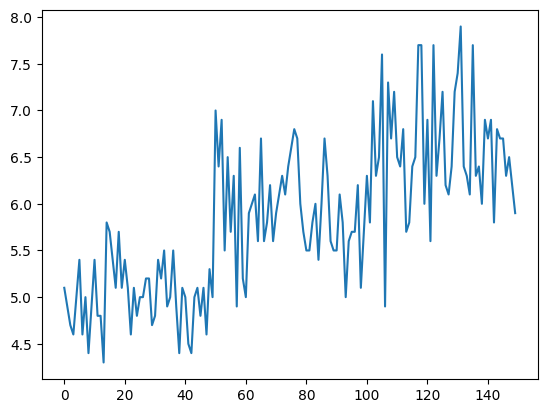

In [15]:
iris_df['sepal_length'].plot()

La visualización generada en la anterior celda genera un objeto de *Matplotlib*. Para configurar **`plotly`**, modificaremos el parámetro **`pd.options.plotting.backend`** de *Pandas* con el nombre de la nueva librería a usar como *backend* en reemplazo de **`matplotlib`**.

In [16]:
pd.options.plotting.backend = "plotly"

Ahora veamos nuevamente el resultado de la visualización:

In [17]:
iris_df['sepal_length'].plot()

La figura anterior es una figura interactiva generada con la librería ***Plotly***.  Con ella se pueden realizar distintos tipos de acciones interactivas como las mencionadas a continuación:

  * Puede **explorar** los valores en los ejes $x$ y $y$ (Botón **"Pan"**). Además, puede usar un botón de la barra de navegación para regresar a la posición original.
  * Puede **examinar** con el zoom áreas específicas de la visualización (Botón **"Zoom"**). Además, puede usar un botón de la barra de navegación para regresar a la escala inicial.
  * Puede pasar el mouse encima de un valor para **revisar** su información específica.
  * Puede **registrar** el estado actual del gráfico como un archivo de imagen en formato ***.png*** (Botón **"Download plot as png"**).

Lo invitamos a explorar estas opciones de forma interactiva antes de continuar con las demás visualizaciones.


### **2.1. Comandos conocidos, resultados interactivos**
---
Esta manera de trabajar con *Plotly* es completamente transparente para el programador, simplemente debemos usar gran parte de las opciones y tipos de visualizaciones que conocemos previamente del módulo **`plot`** de *pandas*. De esta manera estaremos convirtiendo las visualizaciones estáticas tradicionales en herramientas interactivas.

Por ejemplo, supongamos que queremos conocer la distribución de la variable **`sepal_width`** por medio de un diagrama de cajas, diferenciando cada una de las especies de flor:

In [18]:
iris_df[['sepal_width', 'species']].plot(kind='box', color='species')

Observe que se puede ocultar alguna de las especies simplemente haciendo clic en la leyenda de la visualización en la especie que queremos ocultar/mostrar. Esto es muy útil para **comparar** distribuciones entre sí, o incluso, para **resumir** una única distribución.


Sin embargo, al trabajar de esta manera con *Plotly*, tenga en cuenta que de acuerdo a la documentación oficial:

> *El backend de Plotly para Pandas no pretende ser un sustituto directo del predeterminado; no implementa todos o incluso la mayoría de las mismas palabras clave para los argumentos...*

Para conocer más detalles, le recomendamos revisar la **[documentación oficial](https://plotly.com/python/pandas-backend/)** del backend de *Plotly* para *Pandas*.




### **2.2. Exportar visualizaciones desde *Plotly***
---

Las visualizaciones creadas con *Plotly* pueden ser exportadas como:
1. [Imágenes estáticas](https://plotly.com/python/static-image-export/) en formatos como **`PNG`**, **`JPG`**, **`SVG`** y **`PDF`**.
2. [Visualizaciones interactivas en páginas **`HTML`**](https://plotly.com/python/interactive-html-export/).

Veamos algunos ejemplos:

In [19]:
# Primero generamos una figura de Plotly con nuestra visualización.
fig = iris_df[['petal_length', 'species']].plot(kind='hist', color='species')
fig.show()

A partir de la figura generada al llamar una función de visualización de *Plotly* podemos generar imágenes estáticas por medio de la función **`write_image`**:

In [20]:
fig.write_image('histogramas.png') # PNG
fig.write_image('histogramas.jpg') # JPG
fig.write_image('histogramas.svg') # SVG (Formato vectorial)
fig.write_image('histogramas.pdf') # PDF (Formato vectorial)

Además de esto podemos generar una **página _HTML_** interactiva por medio del método **`write_html`**:

In [21]:
fig.write_html('histogramas.html')

Dedique unos momentos para descargar y examinar los archivos exportados de forma local.

> **Nota**: es posible que su navegador esté bloqueando las descargas. En ese caso deberá permitir a *Google Colaboratory* poder descargar archivos.

En el caso que desee que la versión **`HTML`** ocupe menos espacio en disco, puede usar el siguiente parámetro:

In [22]:
fig.write_html('histogramas_lite.html',
               include_plotlyjs='cdn') # Requiere acceso a internet al ejecutar la página generada para ejecutar el script remoto de Plotly.

> **IMPORTANTE:** Estas formas de exportar las visualizaciones construidas con *Plotly* también funcionan de igual manera para los módulos que se exploran a continuación y no son exclusivos de las figuras generadas con el *backend* de *Pandas*.

## **3. Visualizaciones comunes con *Plotly***
---
En esta sección se discutirán las visualizaciones comunes generadas con *Plotly* por medio de sus dos submódulos principales, **`plotly.express`** y **`plotly.graph_objects`**.

En el transcurso del material trabajaremos con el módulo **`plotly.express`** (importado previamente como **`px`**). Este sirve como un módulo de alto nivel desde el cual es posible generar rápidamente las visualizaciones más comunes, de manera similar a **`pyplot`** (importado generalmente como **`plt`**) de *Matplotlib*.

De manera alternativa es posible generar las mismas visualizaciones con el módulo **`plotly.graph_objects`** (importado previamente como **`go`**), que ofrece una mayor personalización y capacidad de manipulación de los objetos **`Figure`** de *Plotly*.

### **3.1. Diagrama de dispersión: `scatter`**
---

La primera visualización común es el **diagrama de dispersión**, discutido en unidades anteriores. Para esto, se utiliza el método **`px.scatter`** con configuraciones que funcionan como se esperaría en librerías como *Matplotlib* o *Seaborn*. En este caso, usaremos dos variables del conjunto de datos de la liga de baloncesto americana *NBA*:

In [23]:
px.scatter(nba_df,        # Nombre del dataframe
                 x='Age',       # Eje x: variable de la edad del jugador
                 y='FG%',       # Eje y: variable de "efectividad" del jugador (anotaciones / intentos)
                 labels = {'Age': 'Edad', 'FG%': 'Efectividad de lanzamientos'} # Etiquetas visibles para cada variable, en forma de diccionario.
                )

Podemos codificar otras variables en canales como el **color** o el **tamaño** de los marcadores.

In [24]:
px.scatter( nba_df,            # Nombre del dataframe.
             x='Height',       # Eje x: variable de la altura del jugador.
             y='FGA',          # Eje y: variable de total de tiros intentados.
             color = 'Weight', # Color (Tono) del marcador: Peso del jugador.
             size = 'FGM',     # Tamaño del marcador: Total de tiros anotados.
             labels = {'Age': 'Edad',
                       'FGM': 'Lanzamientos anotados',
                       'FGA': 'Lanzamientos intentados',
                       'Height': 'Altura (cm)',
                       'Weight': 'Peso (Kg)'
                       })

De igual forma, se pueden componer visualizaciones directamente con el uso de los argumentos **`facet_row`** y **`facet_col`** que permiten **yuxtaponer** visualizaciones a partir de los valores de algunas de sus variables.
Por ejemplo, generaremos una visualización del *dataset* de la NBA que compare la altura del jugador con la cantidad de puntos anotados en total (codificado con la posición en $y$) y de tiro largo (codificado con el tono de color) usando como referencia para la yuxtaposición la posición del jugador. Además, usaremos una gráfica marginal (ubicada en el lateral) de violín para describir la distribución de las alturas de cada grupo de jugadores.

In [25]:
px.scatter(nba_df,
       x="Height",      # Eje X. Altura del jugador.
       y="FGM",         # Eje Y. Tiros anotados.
       color="3PM",     # Color (Tono) del marcador. Tiros de 3 puntos anotados.
       facet_col="Pos", # Composición en columnas de gráficas. Posición del jugador
       marginal_x = 'violin'   # Tipo de función de visualización marginal para la distribución.
       )

### **3.2. Gráficas de líneas: `line`**
---

Otra de las visualizaciones comunes es la gráfica de líneas, discutida en unidades anteriores. En *Plotly*, se genera con el método **`px.line`**, recibiendo los mismos argumentos que los diagramas de dispersión.

In [28]:
# Datos de prueba a partir de funciones trigonométricas.
x = np.linspace(1, 4*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.log(x)

# DataFrame necesario para generar las visualizaciones.
df = pd.DataFrame({'Seno': y1,
                   'Coseno': y2,
                   'Logarítmo':y3},
                  index = x)

# Dependiendo de la naturaleza del dataset, Plotly intenta inferir las variables utilizadas.
fig = px.line(df, labels = {'index': 'x', 'value': 'f(x)'})

fig

Se puede manipular la figura para añadir contenido nuevo. Por ejemplo, si quisiéramos añadir una nueva línea a una figura generada previamente, deberíamos crear un objeto del módulo **_Plotly Graph Objects_** (**`go`**) y añadirlo a la figura.

En este ejemplo, añadiremos una línea con el método **`go.Scatter`**, que permite crear figuras de dos dimensiones en forma de líneas o figuras de tipo dispersión de acuerdo a los argumentos de personalización utilizados para generarlos.

In [29]:
fig.add_trace(go.Scatter(x = x,  # Datos del eje X.
                         y = x,  # Datos del eje Y.
                         name = 'Lineal', # Nombre del objeto Scatter.
                         mode='markers'   # Modo de la línea (Líneas y puntos)
                         ))

Podemos seguir añadiendo objetos gráficos a nuestras figuras. Estos se conservan, por lo que si se ejecuta alguna de estas celdas nuevamente se tendrán dos trazos idénticos en la figura.

In [30]:
fig.add_trace(go.Scatter(x = x,
                         y = x * np.log(x),
                         name = 'Otra',
                         line= {'color': 'orange',
                                'width': 4,
                                'dash': 'dash'} # Argumentos de personalización de la línea.
                         ))

Recuerde que todas las visualizaciones de *Plotly* son interactivas. Esto la convierte, entre otras cosas, en una excelente herramienta para análisis numérico junto a librerías como *NumPy* o *SciPy*.

### **3.3. Gráficas de barras: `bar`**
---

Otra posible codificación permitida en *Plotly* son los diagramas de barras. Esto es posible con la función **`px.bar`** de *Plotly*, que funciona de forma similar a las funciones presentadas hasta ahora.

En este ejemplo utilizaremos el conjunto de datos **`tips`**:


In [31]:
px.bar(tips_df, # DataFrame. Dataset de Propinas 'tips'.
       x = 'sex',          # Eje X. Variable de género.
       y = 'total_bill',   # Eje X. Variable del valor total de la cuenta (factura).
       color = 'smoker')   # Color (Tono) del marcador. Variable de condición de fumador.

A diferencia de otros diagramas de barras, los diagramas interactivos de *Plotly* permiten consultar los elementos particulares que componen cada grupo. Podemos usar los argumentos de composición de visualizaciones para generar aún más variables sobre las que discernir la información generada:

In [32]:
px.bar(tips_df,
       x = 'sex',
       y = 'total_bill',
       color = 'smoker',
       barmode = 'group' # Generar diagramas de barras lado a lado, sin apilar las categorías de color.
)

In [33]:
px.bar(tips_df,
       x="total_bill",     # Eje X. Valor total de la factura.
       y="day",            # Eje Y. Día de la semana.
       color="smoker",     # Color (Tono) del marcador. Variable de condición de fumador.
       barmode = 'group',  # Diagramas de barras lado a lado, sin apilar las categorías de color.
       orientation = 'h',  # Diagrama de barras horizontal

       # Categorías para composición por filas y columnas:
       facet_col="time",   # Composición por columnas. Tiempo del pedido.
       facet_row="sex",    # Composición por columnas. Género del cliente.

       # Se puede forzar el orden de las variables categóricas usadas:
       category_orders={"day": ["Thur", "Fri", "Sat", "Sun"], # Orden de días de la semana.
                        "time": ["Lunch", "Dinner"]}          # Orden del tiempo del pedido.
       )

### **3.4. Diagrama de cajas: `box`**
---

*Plotly* también soporta la construcción de visualizaciones de datos estadísticos como los diagramas de cajas. Esto es posible con el método **`px.box`** y, al igual que antes, cuenta con múltiples argumentos de personalización.

In [34]:
px.box(iris_df,
       x = 'species',        # Eje X (Categórica). Especie de la flor.
       y = 'sepal_length',   # Eje Y (Cuantitativa). Longitud del sépalo.
       color = 'species'     # Color (Tono) del marcador. Especie de la flor (Codificación redundante para enfatizar)
       )

Esta visualización de diagramas de cajas permite conocer con exactitud los valores que caracterizan a este tipo de gráficas, tal como se discutió en unidades anteriores. Si pasa el mouse por encima de un diagrama de barras, podrá apreciar el mínimo, el máximo, los cuartiles 1, 2 (mediana) y 3, y en caso de existir, los valores que sean considerados atípicos (*outliers*).

Además de esta funcionalidad, es posible personalizar por medio de argumentos algunas características de nuestra visualización:

In [35]:
px.box(iris_df,
       x = 'sepal_length',
       y = 'species',
       color = 'species',
       orientation = 'h', # Visualización en disposición horizontal.
       notched = True,    # Estilo "notched" (con hendiduras en la mitad).
       points = 'all',    # Mostrar marcadores al costado de cada elemento. (Mayor costo computacional en conjuntos de datos grandes)
       title = 'Distribución de las especies de flores Iris',      # Título de la gráfica.
       hover_data=["petal_length", "petal_width", "sepal_width"],  # Mostrar más información de variables sin codificación visual al pasar el mouse.
       labels = {'species':'Especies', 'sepal_length': 'Longitud del sépalo'} # Etiquetas por variable.
       )

### **3.5. Histogramas (`histogram`) y otros diagramas de distribución**
---
Adicionalmente, no puede faltar la visualización de histogramas, uno de los diagramas más utilizados en el transcurso del curso para la representación de distribuciones. Estos pueden generarse en *Plotly* con la función **`px.histogram`**:

In [36]:
#Por defecto los histogramas no se superponen, sino que se apilan.

px.histogram(nba_df,
             x = 'FGM',     # Eje X. Tiros anotados.
             color = 'Pos') # Color (tono) de los marcadores (áreas de cada histograma). Posición del jugador.

Para modificar este comportamiento utilizamos el argumento **`barmode`**.

In [37]:
# Si queremos superponerlos (Recuerde que puede ocultar algunos haciendo clic en la leyenda)
px.histogram(nba_df,
             x = 'FGM',
             color = 'Pos',
             barmode="overlay") # Histogramas superpuestos.

Con los histogramas, y en general con los diagramas utilizados para describir distribuciones, es de gran utilidad realizar visualizaciones compuestas de varias codificaciones, que permitan identificar de mejor manera aspectos de la distribución y evidencia de relaciones multivariadas. Muchos de estos se describieron en la unidad 4 con *Seaborn*, y pueden generarse nuevamente en *Plotly* como por ejemplo las visualizaciones marginales (rugplot).

In [38]:
px.histogram(nba_df,
             x='FGM',
             color='Pos',
             nbins=10,        # Número de "bins" o intervalos de clase.
             marginal='rug')  # Tipo de visualización marginal.

Otro método importante para este tipo de visualizaciones es **`plotly.figure_factory.create_distplot`**. Debemos recurrir a este método cuando deseemos generar histogramas con curvas de *KDE*, que no son soportadas actualmente por el método **`px.histogram`**.

In [39]:
import plotly.figure_factory as ff  # Submódulo Figure Factory, responsable de generación de visualizaciones complejas específicas.

cols = ['STL', 'TOV']        # Columnas a representar en los histogramas.

ff.create_distplot(
      [nba_df[c] for c in cols], # Lista de conjuntos de datos usados por cada histograma.
      cols,                      # Etiquetas usadas por cada subgrupo.
      bin_size = 10.0            # Tamaño (rango) de cada intervalo de clase o "bin".
)

Otros métodos para visualizar distribuciones son **`px.strip`** y **`px.violin`**, dos estilos de visualización que ya se exploraron con la librería *Seaborn* anteriormente.

In [40]:
px.strip(nba_df,
         x='3PM',       # Eje X. Tiros de 3 puntos anotados.
         color='Pos')   # Color (Tono) del marcador. Posición del jugador.

In [41]:
px.violin(nba_df,
           x = 'FTM',      # Eje X. Tiros libres anotados.
           color = 'Pos')  # Color (Tono) del marcador. Posición del jugador.

> **Nota:** Es inevitable realizar comparaciones entre *Seaborn* y *Plotly*. Las dos son librerías de visualización muy valiosas y recomendadas para el análisis de datos. Para elegir la mejor opción le recomendamos lo siguiente:
* Utilice *Seaborn* en exploraciones rápidas y generales de sus conjuntos de datos, y cuando requiera de disponer de sus visualizaciones en un formato físico, como en un reporte, un libro o un poster. Si bien *Plotly* permite generar visualizaciones estáticas como imágenes o vectores, no es el objetivo de diseño con el que fue concebido.
* Utilice *Plotly* con conjuntos de datos moderadamente grandes y donde sea necesario explorar en detalle los datos individuales que los conforman y generar rápidamente nuevas combinaciones y puntos de vista. La interactividad viene con un mayor coste computacional que, según el contexto del dominio, puede ser una solución sobredimensionada.




### **3.6. Diagramas circulares y radiales**
---

A pesar de no ser gráficas muy recomendadas debido a problemas en su codificación visual, las gráficas circulares o de torta son una de las codificaciones visuales más populares en reportes de medios de comunicación, entre otros. Las gráficas interactivas de este tipo generadas con *Plotly* permiten reducir el impacto de sus carencias de codificación visual por medio de ángulos gracias a la posibilidad de explorar y ampliar el detalle de secciones importantes de la visualización.

Inicialmente podemos generar gráficas circulares o de torta con la función **`px.pie`**:

In [42]:
px.pie(tips_df, # DataFrame. Dataset de propinas "tips".
       names = 'day',    # Categorías usadas para distinguir cada sección. (Día de la semana)
       values = 'tip',   # Valores representados por cada sección a partir del tamaño del ángulo. (Total de propinas)
       hole = 0.3        # Proporción del agujero del centro.
       )

Además de los gráficos circulares tradicionales, *Plotly* dispone de gráficos de proyección solar o **sunburst**, que disponen de datos jerárquicos con una codificación muy similar.

In [43]:
px.sunburst(tips_df,
            # Lista con el orden (hacia afuera) de las variables categóricas a codificar:
            path=['day', 'time', 'sex'],
            values='tip' # Valor a codificar.
            )

Podemos generar además gráficas en coordenadas polares con el método **`px.scatter_polar`**. Las coordenadas polares codifican una variable por medio del ángulo, en vez de la longitud de uno de los ejes de la gráfica.

Para este ejemplo usaremos el *dataset* de demostración **`wind`**, con información de un experimento de corrientes de viento, dispuesto específicamente para enseñar este tipo de visualización.

In [44]:
# Conjunto de datos de medidas de la velocidad y dirección del viento.
wind_df = px.data.wind()

px.scatter_polar(wind_df,
                 r="frequency",     # Radio. (Posición sobre los ejes)
                 theta="direction", # Ángulo. (Posición alrededor de los ejes)
                 color="strength",  # Color del marcador. Se usa un gradiente de color. (Fuerza de la corriente)
                 symbol="strength"  # Forma del marcador. Codificación redundante (ya estaba en el color).
                 )

Entre otras cosas, la mayoría de las visualizaciones con *Plotly* permiten definir plantillas de codificación visual con estilos específicos, además de la personalización de sus secuencias de color en forma de paletas de color disponibles en el submódulo **`plotly.colors`**.

In [45]:
px.scatter_polar(wind_df,
                 r="frequency",
                 theta="direction",
                 color="strength",
                 symbol="strength",
                 # Añadimos argumentos de personalización de codificación visual.
                 color_discrete_sequence= plotly.colors.sequential.Greens, #Definición de un orden en el color. (No se usa únicamente el tono)
                 template="plotly_dark" # Estilo general de la visualización. (Oscuro)
                 )

Este tipo de codificación en coordenadas polares también está disponible para diagramas con valores discretos. En este caso, se usa una analogía en coordenadas polares de un diagrama de barras por medio del método **`bar_polar`**.

In [ ]:
px.bar_polar(wind_df,
                 r="frequency",     # Radio. (Posición sobre los ejes)
                 theta="direction", # Ángulo. (Posición al rededor de los ejes)
                 color="strength",  # Color del marcador. Se usa un gradiente de color.
                 color_discrete_sequence= px.colors.sequential.Greens, # Definición de un orden en el color. (No se usa únicamente el tono)
                 template="plotly_dark" # Estilo general de la visualización.
        )

Por último, también es posible codificar un diagrama de líneas en coordenadas polares con el método **`px.line_polar`**, usados frecuentemente para representar y comparar estadísticas o medidas de un sujeto, como la habilidad de un deportista o la competencia de un trabajador.

Por ejemplo, representemos la precisión en los tiros de los 5 máximos anotadores de la NBA de la temporada 2014-2015:

In [46]:
# Registros con mayor valor de tiros anotados
top = nba_df.nlargest(5, 'FGM')
top

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
292,LaMarcus Aldridge,71,2512,1661,659,1415,46.6,37,105,35.2,...,30.0,us,"July 19, 1985",University of Texas at Austin,8,207.5,PF,POR,117.00,27.173755
433,Stephen Curry,80,2613,1900,653,1341,48.7,286,646,44.3,...,27.0,us,"March 14, 1988",Davidson College,5,187.5,PG,GSW,85.50,24.320000
194,James Harden,81,2981,2217,647,1470,44.0,208,555,37.5,...,26.0,us,"August 26, 1989",Arizona State University,5,192.5,SG,HOU,99.00,26.716141
29,Anthony Davis,68,2455,1656,642,1199,53.5,1,12,8.3,...,22.0,us,"March 11, 1993",University of Kentucky,2,205.0,PF,NOH,113.85,27.091017
359,Nikola Vucevic,74,2529,1428,631,1206,52.3,2,6,33.3,...,25.0,ch,"October 24, 1990",University of Southern California,3,210.0,C,ORL,117.00,26.530612


In [47]:
columns = ['FG%', '3P%', 'FT%']

px.line_polar(
    top,
    theta = 'Name',    # Etiqueta de cada eje radial. Nombre del jugador
    r = 'FG%',         # Radio de cada eje radial. Precisión de los tiros
    range_r = [0,100], #
    line_close = True
)

## **4. Figuras y componentes**
---

En *Plotly*, al igual que en *Matplotlib*, las visualizaciones generadas son posibles gracias a la creación y personalización de objetos contenedores de sus componentes llamados **figuras**. En el caso de *Plotly*, las figuras y sus componentes hacen parte del submódulo **`plotly.graph_objects`** que hemos discutido en algunos de los ejemplos anteriores.

Cuando creamos una visualización con *Plotly* se retorna un objeto de tipo **`go.Figure`** que contiene la configuración por defecto de la interacción y la representación. Creemos e imprimamos en pantalla el contenido de una figura:


In [48]:
fig = px.scatter(tips_df, x = 'total_bill', y = 'tip')

print(fig)

Figure({
    'data': [{'hovertemplate': 'total_bill=%{x}<br>tip=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([16.99, 10.34, 21.01, ..., 22.67, 17.82, 18.78]),
              'xaxis': 'x',
              'y': array([1.01, 1.66, 3.5 , ..., 2.  , 1.75, 3.  ]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'total_bill'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'tip'}}}
})


Cada figura cuenta con atributos de alto nivel que agrupan parte de su configuración. Esta se divide, con la excepción de las figuras animadas, en los atributos **`data`** y **`layout`**.

### **4.1.  Atributo `data` y objetos *Traces***
---
Este atributo contiene una lista de los componentes de la visualización llamados trazas o *Traces*. Cada uno de ellos es un objeto específico de *Plotly Graph Objects*, con información como las etiquetas, la posición, orientación y demás características de sus marcadores. A continuación veremos algunos de los más importantes.

In [49]:
type(fig.data[0])

plotly.graph_objs._scatter.Scatter

El único componente de la figura generada en el ejemplo anterior con la función **`px.line`** es una traza de tipo **`go.Scatter`**. Este es el objeto básico bidimensional de trazas compuestas por parejas ordenadas representando a los ejes $X$ y $Y$. En esta se distinguen los modos de visualización, que pueden ser en forma de líneas, marcadores sueltos, o ambos.

Se puede generar una nueva traza *Scatter* con el constructor **`go.Scatter`**. Para visualizarlo debemos agregarlo a una figura existente por medio del método **`add_trace`** (o en su versión para múltiples trazas **`add_traces`**) o con el constructor de una figura nueva (**`go.Figure`**).

In [50]:
scatter = go.Scatter(
    x = np.linspace(0, 100, 100),
    y = np.random.randn(100).cumsum(),
    mode = 'lines+markers',    # Tipo del marcador. (lines, markers o lines+markers)
    name = 'Scatter 1'         # Nombre de la traza. Usada en la leyenda de la figura.
)
type(scatter) # Tipo de dato Scatter

plotly.graph_objs._scatter.Scatter

In [51]:
# Añadiendo la traza a la figura creada en el ejemplo anterior
fig.add_trace(scatter)

fig.show()

Como puede notar, el nombre de la traza es usado para su enumeración en el recuadro de leyenda. Ahora, creemos una nueva figura con el constructor **`go.Figure`**:

In [52]:
# Creando una figura con una única traza de tipo Scatter.

fig = go.Figure(data = [scatter])
fig

Adicionalmente a este tipo de trazas, presentamos algunas de las trazas más comunes, basadas en visualizaciones comunes discutidas en el módulo. Estas son:
* Gráfica de barras (**`go.Bar`**):

In [53]:
# Traza de gráfica de barras

bar_trace = go.Bar(
    x = ['A', 'B', 'C', 'D', 'E'], # Etiquetas del eje X. (Categorías)
    y = [1, 2, 4, 8, 16]           # Valores de altura por etiqueta.
)

fig = go.Figure(data = [bar_trace])
fig

* Diagramas de cajas y de violin: **`go.Box`** y **`go.Violin`**

In [55]:
# Creamos el conjunto de datos.
y = np.random.randn(500)

> **Nota:** *Plotly* también permite definir gráficas compuestas en forma de cuadrícula con el método **`plotly.subplots.make_subplots`**.

In [56]:
# Creamos la figura como una figura de 1 fila y 2 columnas.
fig = plotly.subplots.make_subplots(rows=1, cols=2)

In [57]:
# Traza de diagrama de cajas
box_trace = go.Box(
    y = y               # Conjunto de datos cuya distribución es representada en el eje Y.
)

In [58]:
# Traza de diagrama de violín.
violin_trace = go.Violin(
    y = y               # Conjunto de datos cuya distribución es representada en el eje Y.
)

In [59]:
# Añadimos la primera traza en la primera fila y primera columna.
fig.add_trace(box_trace,
              row=1, col=1)

# Añadimos la primera traza en la primera fila y segunda columna.
fig.add_trace(violin_trace,
              row=1, col=2)

fig

* Histograma (**`go.Histogram`**):

In [60]:
# Traza de histograma

hist_trace = go.Histogram(
    x = np.random.randn(100)   # Conjunto de datos cuya distribución es representada.
)

fig = go.Figure(data = [hist_trace])
fig

* Histograma de 2 dimensiones (**`go.Histogram2d`** y **`go.Histogram2dcontour`**):

In [61]:
# Creamos los conjuntos de datos.
x = np.random.randn(500)
y = np.random.randn(500)

In [62]:
# Creamos la figura como una figura de 1 fila y 2 columnas.
fig = plotly.subplots.make_subplots(rows=1, cols=2)

In [63]:
# Traza de histograma discreto en 2 dimensiones
hist2d_trace_disc = go.Histogram2d(
    x = x,              # Conjunto de datos cuya distribución es representada en el eje X.
    y = y               # Conjunto de datos cuya distribución es representada en el eje Y.
)

In [64]:
# Traza de histograma continuo (de densidad) en 2 dimensiones
hist2d_trace_cont = go.Histogram2dContour(
    x = x,              # Conjunto de datos cuya distribución es representada en el eje X.
    y = y               # Conjunto de datos cuya distribución es representada en el eje Y.
)

In [65]:
# Añadimos la primera traza en la primera fila y primera columna.
fig.add_trace(hist2d_trace_disc,
              row=1, col=1)

# Añadimos la primera traza en la primera fila y segunda columna.
fig.add_trace(hist2d_trace_cont,
              row=1, col=2)

fig

* Mapas de calor y líneas de contorno (**`go.Heatmap`** y **`go.Contour`**):

> A diferencia de los diagramas de histogramas en 2 dimensiones, los mapas de calor y de contorno reciben los valores de cada punto del espacio en forma de un arreglo de dos dimensiones (argumento **`z`**).

In [68]:
# Creamos el conjunto de datos.
z = np.random.randn(20,20)

In [69]:
# Creamos la figura como una figura de 1 fila y 2 columnas.
fig = plotly.subplots.make_subplots(rows=1, cols=2)

In [70]:
# Traza de mapa de calor
hmap_trace = go.Heatmap(
    z = z                # Altura o dimensión de cada elemento en la malla de dos dimensiones.
)

In [71]:
# Traza de líneas de contorno
contour_trace = go.Contour(
    z = z               # Altura o dimensión de cada elemento en la malla de dos dimensiones.
)

In [72]:
# Añadimos la primera traza en la primera fila y primera columna.
fig.add_trace(hmap_trace,
              row=1, col=1)

# Añadimos la primera traza en la primera fila y segunda columna.
fig.add_trace(contour_trace,
              row=1, col=2)

fig

* Tablas (**`go.Table`**):

> La interacción con las trazas tabulares consiste en la posibilidad de agarrar y arrastrar las columnas de un lado a otro y desplazar de manera cómoda por su contenido. Son usadas comúnmente como componentes de apoyo de otro tipo de visualizaciones.

In [73]:
# Traza de tipo tabla.

table_trace = go.Table(
    header = dict(values = iris_df.columns,   # Diccionario de configuración del encabezado. Además de definir los valores se puede configurar el estilo.
                  fill_color = 'lightgreen'), # Color de relleno del encabezado.

    cells = dict(values = iris_df.values.T,   # Diccionario de configuración de las celdas. Además de definir los valores se puede configurar el estilo.
                 font_color = 'red',          # Color de fuente de las celdas.
                 align = 'left'),             # Alineación del contenido.
)

fig = go.Figure(data = [table_trace])
fig

Para conocer más tipos de trazas para utilizar como componente de sus visualizaciones consulte la [documentación oficial](https://plotly.com/python/figure-structure/).

### **4.2. Atributo *Layout* y configuración de gráficas**
---
El otro atributo de alto-nivel que compone una figura es el **`layout`**. Este representa la estructura y estilo general de la figura. Cuando se crea una figura, se puede definir un *layout* personalizado con el constructor **`go.Layout`**. Este recibe una gran cantidad de argumentos, entre los que se encuentran:

* Título (**`title`**). Diccionario con información del título como el contenido de texto (**`text`**), la fuente (**`font`**), la posición relativa (**`x`** y **`y`**), la alineación (**`xanchor`** y **`yanchor`**), entre otros.

In [74]:
go.Figure(
    layout = go.Layout(
        title = dict(text = "Título usando <b>HTML</b>",  # Texto con formato en HTML (Solo algunas etiquetas son soportadas)

                     font = dict(                         # Atributo (dict) de fuente HTML usada en el título.
                         family= 'Times New Roman',           # Familia de fuentes HTML.
                         size = 30,                           # Tamaño de fuente.
                         color = '#ff3399'                    # Color de fuente.
                     ),

                     x = 0.5,                              # Posición relativa en x entre 0 y 1. (Desde la izquierda)
                     y = 0.0,                              # Posición relativa en y entre 0 y 1. (Desde abajo)

                     xanchor = 'center',                   # Alineación horizontal.
                     yanchor = 'bottom'                    # Alineación vertical.
        )  # Fin del argumento title.
    )   # Fin del go.Layout
)   # Fin del go.Figure

* Altura y ancho (**`height`** y **`width`**). Dimensión vertical y horizontal en pixeles de la figura. Por defecto se generan figuras de $700 \times 450$ pixeles.

In [75]:
go.Figure(
    #data = ...,
    layout = go.Layout(
      width = 800,  # Ancho de la figura en pixeles.
      height = 800  # Alto de la figura en pixeles.
    )
)

* Color del fondo de la figura y de fondo de la gráfica (**`paper_bgcolor`** y **`plot_bgcolor`**). Colores definidos con palabras clave o código de color *HTML* para el fondo de las figuras.

In [76]:
go.Figure(
    layout = go.Layout(
      paper_bgcolor = 'lightyellow',  # Color del fondo general (en amarillo).
      plot_bgcolor = 'lightblue'      # Color del fondo de la gráfica (en azul).
    )
)

* Estilo del recuadro de leyenda (**`show_legend`** y **`legend`**). Configuración del estilo de la leyenda, definiendo detalles como:
  * Posición (**`x`** y **`y`**).
  * Color y grosor del borde (**`bordercolor`** y **`borderwidth`**).
  * Color del fondo (**`bgcolor`**).
  * Orientación de los elementos (**`orientation`**).
  * Fuente de los elementos (**`font`**).
  * Estilo del título (**`title`**).

In [85]:
go.Figure(
    #data: Trazas de ejemplos del dataset Iris.
    data = [go.Scatter(x = iris_df['sepal_length'],  y = iris_df['sepal_width'], name = 'Sépalo', mode = 'markers'),
            go.Scatter(x = iris_df['petal_length'],  y = iris_df['petal_width'], name = 'Pétalo', mode = 'markers')
    ],
    layout = go.Layout(
            showlegend = True,    # Argumento para mostrar u ocultar la leyenda.
            legend = dict(
                x = 0,                   # Posición relativa en X. (Entre 0 y 1, desde la izquierda)
                y = -0.1,                   # Posición relativa en Y. (Entre 0 y 1, desde abajo)
                borderwidth = 1,         # Grosor del borde. (Por defecto 0 pixeles)
                bordercolor = 'black',     # Color del borde.
                bgcolor = 'white',      # Color del fondo.
                orientation = 'h',       # Orientación de la lista. ('v' o 'h')
                font = dict(             # Definición de la fuente HTML.
                    color = 'black',          # Color de la fuente.
                    family = 'Consolas', # Familia de la fuente.
                    size = 12                 # Tamaño de la fuente.
                ),
                title = dict(            # Definición de la configuración del título de la leyenda.
                        text = 'Leyenda',            # Texto del título.
                        side = 'top',                # Posición del título.
                        font = dict(                 # Definición de la fuente HTML del título.
                          color = 'purple',               # Color de la fuente.
                          family = 'Arial',       # Familia de la fuente.
                          size = 30                       # Tamaño de la fuente.
                      )
                )
            ) # Fin argumento legend.
    ) # Fin go.Layout
) # Fin go.Figure

Para conocer más argumentos de configuración del estilo de los componentes de las figuras, consulte el siguiente [enlace](https://plotly.com/python/reference/layout/) de la documentación oficial.

#### **4.2.1. Argumento de configuración de la interacción `config`**
---
Más allá de la codificación visual, es posible configurar la interacción con el usuario por medio de las opciones de configuración usadas como argumento del método **`fig.show`** de las figuras de *Plotly*.

Este argumento se define como un diccionario de *Python* con los argumentos de configuración expuestos a continuación. Primero crearemos una figura:

In [86]:
# Creamos los datos artificiales y la figura.

fig = px.scatter(iris_df, x = 'sepal_length', y = 'sepal_width', color = 'species', width= 800, height = 600)

* **`scrollZoom`**: Este argumento permite definir el comportamiento por defecto del *scroll* (rueda del ratón) para realizar acciones de zoom. Si gira la rueda del ratón en la siguiente figura verá que no ocurre nada:

In [87]:
fig.show()

Sin embargo, si añadimos un diccionario de configuración al método **`show`**, podemos usar el *scroll* para acercar y alejar la cámara.

In [88]:
config = {
    'scrollZoom': True      # Por defecto el valor es False.
}

fig.show(config = config) # Use la rueda del ratón para hacer zoom en la figura.

* **`displayModeBar`**: Este argumento permite definir la visibilidad de la barra de herramientas ubicada en la parte superior izquierda. Si se usa un valor booleano **`True`**, la barra estará visible en todo momento, mientras que **`False`** la oculta para siempre. Por defecto, la barra solo es visible cuando el usuario pasa el cursor por encima de su posición.

In [92]:
config = {
    'displayModeBar': True      # La barra está siempre visible.
}

fig.show(config = config)

In [93]:
config = {
    'displayModeBar': False      # La barra no está visible nunca.
}
fig
fig.show(config = config)

* **`toImageButtonOptions`**: Este argumento permite definir los detalles de las imágenes generadas con el botón de descarga de la barra de herramientas. Este cuenta a su vez con los siguientes argumentos:
  * **`format`**. Formato de la imagen generada.
  * **`filename`**. Nombre del archivo generado.
  * **`height`**. Altura de la imagen.
  * **`width`**. Ancho de la imagen.

In [94]:
config = {
  'toImageButtonOptions': {
    'format': 'svg',                    # Formato de la imagen (png, svg, jpeg y webp).
    'filename': 'ejemplo',              # Nombre de la imagen.
    'height': 600,                      # Altura de la imagen.
    'width': 800                        # Ancho de la imagen.
  }
}

fig.show(config = config) # Use la rueda del ratón para hacer zoom en la figura.

* **`editable`**: Este argumento permite al usuario editar el contenido de la gráfica, como el texto del título o editar y crear ciertos componentes (véase el siguiente argumento para más información).

In [99]:
config= {
    'editable': True
}

fig.show(config = config) # Puede seleccionar y editar el títulos, los ejes y la leyenda.

* **`modeBarButtonsToAdd`** y **`modeBarButtonsToRemove`**: Estos argumentos permiten añadir y eliminar botones de la barra de herramientas. Los siguientes son los botones por defecto de las gráficas en 2 dimensiones:

  * **`zoom2d`**. Activar modo *zoom*.
  * **`pan2d`**. Activar modo *pan*.
  * **`select2d`**. Selección de caja.
  * **`lasso2d`**. Selección de lazo.
  * **`zoomIn2d`**. Acercar la cámara.
  * **`zoomOut2d`**. Alejar la cámara.
  * **`autoScale2d`**. Autoescalado.
  * **`resetScale2d`**. Reiniciar la posición.

In [100]:
config= {
    # Los botones asignados en el siguiente argumento desaparecerán de la barra de herramientas.
    'modeBarButtonsToRemove': ['select2d', 'lasso2d', 'resetScale2d', 'zoom2d'],
}

fig.show(config = config)

*Plotly* cuenta con herramientas de dibujo opcionales que permiten modificar la figura. Estas herramientas se pueden agregar como botones de la barra de herramientas con el argumento **`modeBarButtonsToAdd`**. Estas son:

  * **`drawline`**: Modo de dibujo de líneas.
  * **`drawopenpath`**: Modo de dibujo de figuras abiertas.
  * **`drawclosedpath`**: Modo de dibujo de figuras cerradas.
  * **`drawcircle`**: Modo de dibujo de elipses.
  * **`drawrect`**: Modo de dibujo de rectángulos.
  * **`eraseshape`**: Modo de borrado de formas.

In [102]:
config= {
    'editable': True,  # Es necesario permitir la edición de la figura para utilizar estas herramientas.
    # Los botones asignados en el siguiente argumento se añadirán a la barra de herramientas.
    'modeBarButtonsToAdd':['drawline', 'drawopenpath', 'drawclosedpath', 'drawcircle', 'drawrect', 'eraseshape']
}

fig.show(config = config)

Lo invitamos a consultar la documentación oficial para conocer más acerca de las [opciones de configuración](https://plotly.com/python/configuration-options/) y  las [configuraciones de dibujo y anotaciones](https://plotly.com/python/shapes/#drawing-shapes-with-a-mouse-on-cartesian-plots).

## **5. Visualizaciones avanzadas con *Plotly***
---

*Plotly* ofrece una gran variedad de estilos de visualización distintos, construidos a partir de muchos casos de uso comunes de disciplinas distintas. Recuerde que las librerías de código abierto como *Plotly* u otras discutidas en este módulo son muy variables y con el tiempo se añaden funcionalidades nuevas gracias a un continuo apoyo de la comunidad. Se le recomienda consultar la documentación oficial de cada herramienta usada en busca de codificaciones específicas. En muchos casos, este tipo de visualizaciones ya están programadas y es cuestión de explorar y entender las funciones específicas, sus argumentos y detalles más importantes.

En la documentación de *Plotly* encontrará funciones para:

  * [**Gráficas estadísticas**](https://plotly.com/python/statistical-charts/)
  * [**Gráficas financieras**](https://plotly.com/python/financial-charts/)
  * [**Gráficas científicas**](https://plotly.com/python/scientific-charts/)
  * [**Gráficas para *Machine Learning* e inteligencia artificial**](https://plotly.com/python/ai-ml/)
  * [**Visualización de mapas**](https://plotly.com/python/choropleth-maps/) (Estas se verán en los siguientes materiales)
  * [**Composición de *subplots***](https://plotly.com/python/subplot-charts/)
  * [**Controles personalizados y transformaciones**.](https://plotly.com/python/chart-events/)
  * [**Animaciones**](https://plotly.com/python/animations/).
  * ...entre otras cosas.
  
En esta guía presentaremos brevemente algunas de estas ideas. Para más información, recuerde profundizar consultando la [documentación oficial](https://plotly.com/python/).


#### **5.1. Gráficas 3D**
---

Diagramar información en el espacio en 3 o más dimensiones es mucho más delicado de manejar cuando se trata de visualizaciones complejas debido a su tipo de codificación. Para esto, la interacción cobra un papel muy importante, que permite explorar y manejar mejor este tipo de espacios.


##### **5.1.1. Superfices 3D**
---
Una de las posibilidades con *Plotly* es la visualización de superficies en 3 dimensiones. Para esto, usaremos la función **`go.Surface`** para generar este componente de tipo traza y añadirlo a una figura de *Plotly*.

In [103]:
# Generamos los datos artificiales.
n = 100
x = np.linspace(-15, 15, n)
y = np.linspace(15, -15, n)

# Creamos el DataFrame con los datos.
surface_df = pd.DataFrame({'x': x,
                           'y': y,
                           'z': y - x
                           })

# Generamos una figura con una traza de tipo go.Surface.
fig = go.Figure(data=[go.Surface(z = surface_df)])

fig

Si quiere conocer más acerca de este tipo de visualizaciones, diríjase al siguiente [enlace](https://plot.ly/python/3d-surface-plots/) para conocer otros ejemplos.

##### **5.1.2. Diagramas de dispersión en 3D**
---
Los diagramas de dispersión vistos hasta el momento están limitados a un máximo de dos variables simultáneas por gráfica. Al usar marcadores en un espacio de tres dimensiones se puede visualizar la dispersión de los datos de una manera más detallada, añadiendo una variable codificada en la posición del eje $z$. Esto es posible con el método **`px.scatter3d`**. Por ejemplo, considere la relación de 2 variables del *dataset* *Iris* y luego su codificación en 3 dimensiones espaciales.

In [104]:
# Diagrama de dispersión de 2 dimensiones.
px.scatter(iris_df, x = 'petal_length', y = 'sepal_length', color = 'species')

Ahora, representemos la relación de todas sus variables codificando las 3 coordenadas espaciales y el tamaño del marcador:

In [105]:
# Diagrama de dispersión de 3 dimensiones.
px.scatter_3d(iris_df,
              x='sepal_width',     # Eje X.
              y='petal_length',    # Eje Y.
              z='sepal_length',    # Eje Z.
              color='species',     # Color del marcador.
              symbol='species',    # Forma del marcador.
              size='petal_width',  # Tamaño del marcador.
              size_max=20,         # Tamaño máximo del marcador.
              )

### **5.2. Mapas de calor: `heatmap`**
---

*Plotly* también permite generar mapas de calor a partir de datos matriciales, como en *Seaborn*. La interactividad permite crear gráficas menos densas y con el contenido mostrado de manera dinámica según lo que requiere el usuario. Gracias a esto, podemos generar diagramas que de otra forma serían imposibles de visualizar de una manera adecuada, sobre todo, cuando se trata de *datasets* con muchas variables. Estos mapas se pueden generar con el método **`px.imshow`** (similar al método **`plt.imshow`** de *Matplotlib*).

Para demostrar su funcionalidad, generaremos un mapa de calor de la matriz de correlación del *dataset* de la *NBA*.

In [107]:
# Matriz de correlación de la NBA en forma tabular.
nba_df.corr(numeric_only=True)

,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,BLK,TOV,PF,EFF,AST/TOV,STL/TOV,Age,Height,Weight,BMI
Games Played,1.000000,0.872067,0.729793,0.741910,0.749665,0.398915,0.526596,0.549492,0.259846,0.578523,...,0.445126,0.701613,0.861284,0.754417,0.190144,0.026366,0.117221,0.055774,0.063847,0.056709
MIN,0.872067,1.000000,0.926114,0.929450,0.936980,0.322605,0.654616,0.673860,0.319390,0.783030,...,0.481055,0.866283,0.877292,0.924503,0.216520,-0.034276,0.053525,-0.013396,0.015660,0.053552
PTS,0.729793,0.926114,1.000000,0.990930,0.989074,0.297399,0.665916,0.674770,0.321913,0.911545,...,0.442073,0.884054,0.761500,0.949832,0.179360,-0.092205,0.014806,-0.033171,0.019919,0.082969
FGM,0.741910,0.929450,0.990930,1.000000,0.988572,0.329426,0.603672,0.613697,0.284458,0.872111,...,0.485453,0.872323,0.781881,0.959300,0.163492,-0.099303,0.013320,0.008839,0.063065,0.106202
FGA,0.749665,0.936980,0.989074,0.988572,1.000000,0.259349,0.666728,0.687724,0.331684,0.868036,...,0.409447,0.888294,0.772240,0.928189,0.204028,-0.096735,0.010197,-0.054262,-0.002983,0.068523
FG%,0.398915,0.322605,0.297399,0.329426,0.259349,1.000000,0.009326,-0.016984,-0.037257,0.255484,...,0.418739,0.245523,0.387613,0.396362,-0.095973,-0.023189,0.099855,0.346980,0.367244,0.217936
3PM,0.526596,0.654616,0.665916,0.603672,0.666728,0.009326,1.000000,0.988158,0.557535,0.494256,...,-0.026598,0.549510,0.452584,0.518820,0.275277,0.031486,0.070754,-0.270571,-0.274269,-0.141555
3PA,0.549492,0.673860,0.674770,0.613697,0.687724,-0.016984,0.988158,1.000000,0.553835,0.507775,...,-0.033987,0.576765,0.474171,0.521303,0.295508,0.033982,0.055550,-0.294236,-0.295696,-0.149342
3P%,0.259846,0.319390,0.321913,0.284458,0.331684,-0.037257,0.557535,0.553835,1.000000,0.223503,...,-0.195485,0.250038,0.143795,0.203406,0.364446,0.113257,-0.002366,-0.353132,-0.439524,-0.341259
FTM,0.578523,0.783030,0.911545,0.872111,0.868036,0.255484,0.494256,0.507775,0.223503,1.000000,...,0.416536,0.840158,0.630326,0.866159,0.126781,-0.107838,-0.015329,-0.037000,0.027302,0.101372


In [109]:
# Mapa de calor interactivo de la matriz de correlación.
px.imshow(nba_df.corr(numeric_only=True))

A pesar de darle convenientemente la utilidad de generación de mapas de calor, la función **`imshow`** está diseñada para visualizar imágenes y la información de sus componentes de color [**rgb**](https://es.wikipedia.org/wiki/RGB), para apoyar tareas de procesamiento y análisis de imágenes.

In [110]:
from PIL import Image  # Librería de manejo de imágenes (Python Imaging Library)

# Descargamos una imagen de ejemplo.
!wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=1aStBMEL0Ax0yL7pCMVu7c_mbds1oZMIS' -O mario_8bit_data.bmp

In [112]:
# Cargamos la imagen en forma de arreglo de Numpy con sus componentes RGB.
mario = np.array(Image.open('mario_8bit_data.bmp'))

px.imshow(mario, width=400, height=400) # Visualizamos interactivamente la imagen.

*Plotly* dispone de una función adicional para la generación de mapas de calor a partir de la densidad de variables numéricas de un *dataset*, que sirve de analogía en 2 dimensiones de un histograma. Esta función es **`px.density_heatmap`**, que acepta argumentos similares a la función **`px.histogram`**. Probemos con el *dataset* de propinas *tips*:

In [113]:
px.density_heatmap(tips_df,
                   x="total_bill",              # Variable del eje X. Total de la factura
                   y="tip",                     # Variable del eje Y. Valor de la propina
                   nbinsx=10,                   # Número de intervalos de clase para la variable del eje X.
                   nbinsy=10,                   # Número de intervalos de clase para la variable del eje Y.
                   marginal_x = 'histogram',    # Visualización marginal en el eje X.
                   marginal_y = 'rug'           # Visualización marginal en el eje Y.
                   )

Además de esto, se pueden definir otras codificaciones, como la composición en filas y columnas.

In [114]:
px.density_heatmap(tips_df,
                   x="total_bill", # Variable del eje X. Total de la factura.
                   y="tip",        # Variable del eje Y. Valor de la propina.
                   nbinsx=20,      # Número de intervalos de clase para la variable del eje X.
                   nbinsy=20,      # Número de intervalos de clase para la variable del eje Y.
                   facet_col = 'sex',   # Composición en columnas por género.
                   facet_row = 'time'   # Composición en columnas por momento del día.
                   )

### **5.3. Matriz de dispersión: `scatter_matrix`**
---

*Plotly* dispone también de codificaciones visuales compuestas de varios componentes comunes. Uno de los ejemplos vistos en materiales anteriores fue el método **`pairplot`** de *Seaborn*. El equivalente en *Plotly* es el método **`scatter_matrix`**, que genera una gráfica similar, pero con la posibilidad de obtener información detallada de cada punto.

In [115]:
px.scatter_matrix(iris_df,
                  # Subconjunto de las variables a representar como índices de la matriz:
                  dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"],
                  color="species" # Codificación general por tonalidad de color.
                  )

### **5.4. Figuras animadas**
---

*Plotly* permite codificar más variables por medio de la definición de animaciones, permitiendo codificar aspectos en la dimensión del **tiempo**. Esto es muy recomendado cuando se trabaja con series de tiempo, pues es posible representar la evolución de otras variables gráficamente, sin necesidad de codificar el tiempo en canales como la posición o mediante la composición de gráficas.

Representaremos la evolución de algunas variables demográficas por país recopiladas en el *dataset* **`gapminder`** disponible en el submódulo **`plotly.data`**:

In [116]:
# Datos generales por país con el transcurso de los años.
gap_df = px.data.gapminder()

gap_df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


Calculamos el máximo tamaño de barra posible (población total) por combinación de año y continente para dejarlo fijo en todo el transcurso de la animación. Si no se define la figura se adapta a los límites de los datos de cada *frame*.

In [117]:
# Valor máximo de la población en todos los años.
barmax = gap_df.groupby(['continent', 'year'])['pop'].sum().max()

Ahora, usaremos la misma función **`px.bar`** usada en secciones anteriores para generar una figura animada. Ejecute la siguiente celda y haga clic en el icono de *Play* para ver la animación o desplace la barra para realizar el recorrido en el tiempo.

In [118]:
px.bar(gap_df,
       x="continent",             # Variable en la posición x. (Categoría)
       y="pop",                   # Variable en la posición y. (Magnitud)
       color="continent",         # Color (tono) de las barras.
       animation_frame="year",    # Variable a codificar en el tiempo.
       animation_group="country", # Variable usada para mantener consistencia y relación entre los frames.
       range_y=[0, barmax]      # Rango fijo del eje y para toda la animación.
)

Esta idea es generalizable a varias de las funciones disponibles en *Plotly* como en el caso de **`px.scatter`**:

In [119]:
# Otro ejemplo, usando la evolución de funciones matemáticas.

# Generamos los datos artificiales:
n = 1000
x = np.linspace(-np.pi, np.pi, n) # Espacio de -pi a pi.

# DataFrame con las funciones matemáticas a representar, distinguidas por un frame de referencia 'i'.
math_df = pd.concat([pd.DataFrame({'x': x,
                                   'y': x*np.cos(i*x),
                                   'i': i}) for i in np.arange(1, 15)])

px.scatter(math_df,
         x = 'x',
         y = 'y',
         animation_frame  = 'i',
         range_x = [-np.pi, np.pi],
         range_y = [-np.pi, np.pi]
         )

## **Recursos adicionales**
---
Los siguientes enlaces corresponden a sitios en donde encontrará información muy útil para profundizar en el conocimiento de las funcionalidades de la librería *Plotly*, empezando por su documentación oficial:

* [Plotly Getting Started](https://plotly.com/python/getting-started/)
* [Plotly Gallery](https://plotly.com/python/)
* [Coursera - Data Visualization with Plotly Express (Guided Project)](https://www.coursera.org/projects/data-visualization-plotly-express)
* [Kaggle - Plotly Tutorial for Beginners](https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners)
* [Plotly en JavaScript](https://plotly.com/javascript/)
* [Plotly Animations](https://plotly.com/python/animations/)






## **Créditos**
---

* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistente docente:** Alberto Nicolai Romero Martínez

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*